# STINTSY GROUP 8 MACHINE PROJECT
## PIANO, TAHIMIC, TAMAYO, TIPAN

## I. INTRODUCTION

The dataset selected for this project is the "House Prices" dataset, encompassing house sale data in King County from May 2014 to May 2015. This project aims to tackle a significant problem in the real estate domain: predicting house prices. By employing regression analysis, we seek to establish a predictive model that estimates house prices based on various features like size, condition, location, etc. This endeavor is crucial as it aids in real estate valuation, informs investment decisions, and can be a valuable tool for urban planning and housing market analysis. Specifically, the project will explore whether a more complex regression model (such as multiple or polynomial regression) provides a more accurate prediction compared to a simple linear approach, given the multifaceted nature of real estate pricing.

## II. Description of the Dataset

This dataset offers a comprehensive snapshot of the real estate market in King County, covering a one-year period from May 2014 to May 2015. It includes data on 21,613 properties, each characterized by 20 features. These features range from basic descriptors like the number of bedrooms and bathrooms (‘bedrooms’, ‘bathrooms’) to more nuanced ones like the quality of view (‘view’) and construction grade (‘grade’). Each row in the dataset represents a unique property, while columns encapsulate these diverse characteristics.

In terms of data collection, while specific details are not provided, it is typical for such datasets to be compiled from property sales records, real estate listings, and county tax assessments. This method implies potential biases - the dataset may not represent unlisted properties or those not involved in transactions during this period. Furthermore, the geographic and temporal scope of the data may affect the generalizability of our findings, as housing markets can vary significantly across regions and over time.

Each feature in the dataset potentially influences the property's price. For instance, ‘sqft_living’ and ‘sqft_lot’ directly relate to the size of the property, a significant price determinant. The presence of a waterfront (‘waterfront’) or a high construction grade (‘grade’) likely elevates property values due to their desirability and quality. Understanding these relationships will be crucial in building our predictive model.

### Tabularized List of Variables

| [house_prices.csv] **Variable Name** | **Description**|
|--------------------------------------|----------------|
|**id** | A notation for the house|
|**date** | Date the house is sold|
|**price** | The Sale price of the house|
|**bedrooms** | The Number of bedrooms |
|**bathrooms** | The Number of bathrooms |
|**sqft_livin** | Size of the living area in square feet |
|**sqft_lo**t | Size of the lot in square feet |
|**floors** | Total floors in the house |
|**waterfront** | '1' if the property has waterfront, '0' if none |
|**view** | An index of 0 to 4 of good the view of the property was |
|**condition** | Condition of the house, ranked from 1 to 5 |
|**grade** | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. |
|**sqft_above** | Square feet above ground |
|**sqft_basement** | Square feet below ground |
|**yr_built** | Year the house was built |
|**yr_renovated** | Year the house was renovated, 0 if never renovated |
|**zipcode** | 5 Digit zip code |
|**lat** | Latitude Coordinate |
|**long** | Longitude Cooridinate |
|**sqft_living15** | Average size of interior housing living space for the closest 15 houses, in square feet |
|**sqft_lot15** | Average size of land lots for the closest 15 houses, in square feet |

## III. Libraries Required

For this project, the following Python libraries have been utilized:

- `pandas`: For efficient data handling and manipulation.
- `numpy`: For numerical computations and handling array-type data structures.
- `matplotlib` and `seaborn`: For data visualization, crucial in understanding data distributions and patterns.
- `scikit-learn`: For implementing and evaluating various regression models. This library provides a comprehensive suite of tools for machine learning tasks.

## IV. DATA PREPROCESSING AND CLEANING

In this section, we will be performing various preprocessing and cleaning techniques to enhance the dataset's suitability for when we do exploratory analysis and and model training.

We'll be looking at Data Cleaning including the checking for missing values, handling duplicate entries across all features, ensuring consistent data type consistency, and outlier detection and treatment.

Additionally, we will go into Data Preprocessing, organized into sub-sections such as why we decided to normalize the data, feature engineering, feature dropping, removing features with weak positive correlation, and the removal of the 'date' featue. 


In [1]:
import pandas as pd
house = pd.read_csv('house_prices.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Checking for Missing Values
Missing values in a dataset can greatly influence the outcome of analyses and predictive modeling. They can lead to biased estimates, reduced statistical power, and erroneous conclusions. It's crucial to identify and appropriately handle these missing values to ensure the integrity and reliability of our analysis.

In [2]:
# Checking for missing values in each column
missing_values = house.isnull().sum()

# Display the columns with missing values and their count
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Series([], dtype: int64)


## Handling Duplicate Entries Across All Features

Duplicate entries, when considering all features of a dataset, may indicate exact replicas of data points. These exact duplicates could be a result of data entry errors or data collection issues and can lead to skewed analyses and biased model training. Unlike duplicates based on a single identifier like 'id', which might be legitimate in certain contexts (such as a house being sold multiple times), complete feature-wise duplicates typically do not add value and can distort the true distribution of the data.

In [3]:
duplicate_ids = house.duplicated(keep=False)
duplicates = house[duplicate_ids]

# Display the duplicate rows
print("Duplicate Entries:\n", duplicates)

# Removing duplicates if found
if not duplicates.empty:
    df = df.drop_duplicates(keep='first')
    print(f"Duplicates removed. New dataset size: {df.shape[0]} rows.")
else:
    print("No complete duplicates found across all features.")

Duplicate Entries:
 Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]
No complete duplicates found across all features.


## Ensuring Data Type Consistency

Proper data type alignment is critical for precise and effective data analysis and modeling. Incorrect data types can lead to erroneous calculations and modeling outcomes. It's essential to ensure that each feature in the dataset is represented by the most appropriate data type for its nature and the intended analytical use.

Assessing each feature individually to determine if its data type aligns with its real-world representation and analysis requirements. For instance, the 'bathrooms' feature represents a count that can include half-bathrooms (e.g., a toilet and sink, but no shower), hence it is appropriately maintained as a floating value.

In [4]:
print("Current Data Types:\n", house.dtypes)

# Converting 'date' from object to datetime
house['date'] = pd.to_datetime(house['date'])

# Converting 'zipcode' to a categorical variable
house['zipcode'] = house['zipcode'].astype('category')

print("\nUpdated Data Types:\n", house.dtypes)

Current Data Types:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Updated Data Types:
 id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sq

## Outlier Detection and Treatment

Outliers are extreme values that deviate significantly from the rest of the data. They can arise due to various reasons like measurement errors, data entry errors, or genuine variation. In statistical analyses and predictive modeling, outliers can have a disproportionate influence on the results, leading to skewed estimates and reduced model performance. Therefore, it's essential to identify and appropriately handle outliers.

### Approach
We will employ both statistical methods and visualizations to detect outliers in our dataset.

- **Statistical Method**: The Interquartile Range (IQR) method will be used. The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. An outlier is often considered if a value is below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR).
- **Visualization**: Boxplots will provide a visual means to identify outliers.

Once identified, the treatment of outliers will be context-dependent:
- **Removal**: If an outlier appears to be a result of an error.
- **Capping**: If the outlier is genuine but disproportionately influences the dataset.
- **Transformation**: Applying transformations (e.g., log transformation) to reduce the impact of outliers.

In [5]:
!pip install -q seaborn

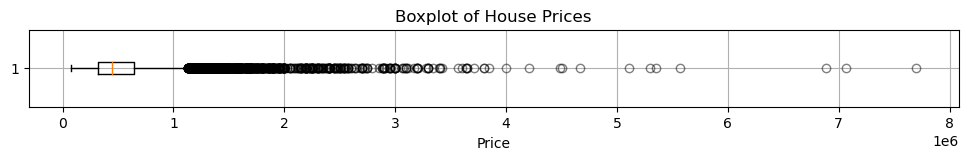

Number of Outliers in Price: 1146


In [6]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Boxplot to visualize outliers in 'price' column
# Improved Boxplot Visualization
plt.figure(figsize=(12, 1))
plt.boxplot(house['price'], vert=False, flierprops=dict(marker='o', color='red', alpha=0.5))
plt.title('Boxplot of House Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.grid(True)
plt.show()

# Calculating IQR for 'price'
Q1 = house['price'].quantile(0.25)
Q3 = house['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = house[(house['price'] < lower_bound) | (house['price'] > upper_bound)]
print("Number of Outliers in Price:", len(outliers))


The boxplot visualization and Interquartile Range (IQR) method revealed a significant number of outliers in the 'price' variable of our dataset. Specifically, we identified **1,146 outliers**. These outliers are data points that deviate markedly from the rest of the distribution, lying outside the typical range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR).

### Decision to Normalize Data
Given the substantial number of outliers, normalizing the data becomes a crucial step in our preprocessing pipeline. Normalization will help in mitigating the impact of these extreme values on our analysis and models. By transforming the data into a consistent scale, we ensure that our model is not unduly influenced by these outliers and can generalize better across the entire dataset.

## Data Transformation
### Feature Engineering
Feature engineering is a critical step in data preprocessing, especially in machine learning projects. By creating new features from existing ones, we can uncover additional insights that are not immediately apparent from the raw data. Well-crafted features can significantly improve the performance of predictive models by providing them with more relevant information.

Given the nature of our dataset and the time frame it covers (May 2014 to May 2015), we can engineer the following features:

- **age_of_house**: This feature will represent the age of the house at the time of sale. It can be calculated as the difference between the year the house was sold ('date') and the year it was built ('yr_built').
- **renovated_flag**: This binary feature will indicate whether the house was renovated or not. We can derive this from 'yr_renovated', where a value of 0 indicates no renovation.


In [7]:
# Creating 'age_of_house' feature
# Extracting year from 'date' column
house['year_sold'] = pd.to_datetime(house['date']).dt.year
# Calculating the age of the house when it was sold
house['age_of_house'] = house['year_sold'] - house['yr_built']

# Creating 'renovated_flag' feature
# A binary flag indicating whether the house was renovated (1) or not (0)
house['renovated_flag'] = house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Delete not needed features
# house.drop(['yr_built', 'yr_renovated', 'date', 'year_sold'], axis=1, inplace=True)

# Displaying the first few rows to verify new features
print(house[['age_of_house', 'renovated_flag']].head())


   age_of_house  renovated_flag
0            59               0
1            63               1
2            82               0
3            49               0
4            28               0


In [8]:
# Checking the number of unique values in the 'zipcode' column
num_unique_zipcodes = house['zipcode'].nunique()
print(f"Number of unique zipcodes: {num_unique_zipcodes}")


Number of unique zipcodes: 70


## Dropping
In the process of preparing our dataset for analysis and modeling, it's often beneficial to remove features that are not contributing meaningful information or might complicate the modeling process.

- **'id'**: The 'id' column is a unique identifier for each house. While it's useful for identifying records, it does not contribute any predictive power for the purpose of our analysis, which focuses on the factors affecting house prices. Including it in the model could add unnecessary complexity without any benefit.

- **'zipcode'**: The 'zipcode' feature, despite potentially offering some geographical insights, presents a challenge for one-hot encoding due to its high cardinality (number of unique values). High cardinality categorical features can lead to a significant increase in dataset dimensions when one-hot encoded, which might, in turn, lead to issues like increased model complexity and overfitting. Considering these challenges and to maintain model simplicity and efficiency, we opt to drop this feature.

In [9]:
# Dropping the 'id' and 'zipcode' columns
house = house.drop(['id', 'zipcode'], axis=1)

## Removing Features with Weak Positive Correlation
We will remove features that have a positive correlation with 'price' below our threshold of 0.2. This step aims to simplify the model by excluding features that are unlikely to provide substantial predictive value. However, all features with negative correlations will be kept, as they might have underlying significance in our predictive analysis.

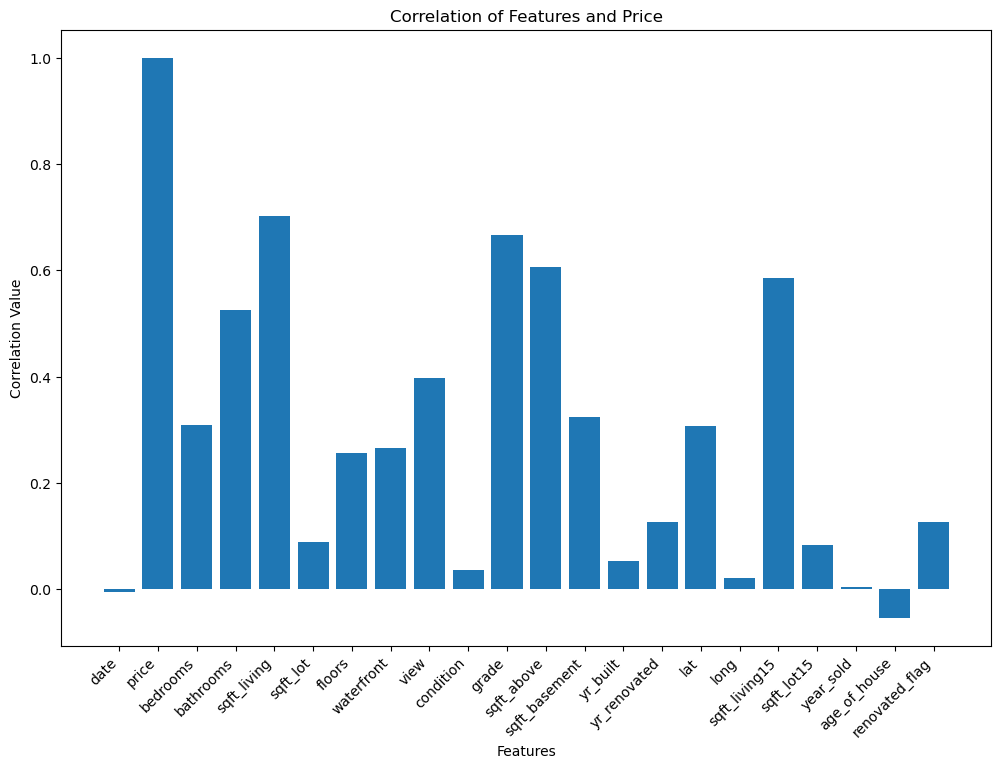

In [10]:
correlation_matrix = house.corr()
corr_price = correlation_matrix['price']

plt.figure(figsize=(12, 8)) 
plt.bar(corr_price.index, corr_price.values)
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation of Features and Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Define a correlation threshold
correlation_threshold = 0.2

# Identifying weakly positively correlated features to be removed
features_to_remove = corr_price[(corr_price < correlation_threshold) & (corr_price >= 0)].index.tolist()
print("Weakly positively correlated features to be removed:", features_to_remove)

# Dropping these features
house = house.drop(features_to_remove, axis=1)


Weakly positively correlated features to be removed: ['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'long', 'sqft_lot15', 'year_sold', 'renovated_flag']


## Removing the 'Date' Feature

The 'date' feature, representing the date when the house was sold, can be a complex variable to use in predictive modeling. While it might contain some temporal information that could be relevant, its format and nature pose several challenges:

- **Complexity in Use** Date data can be complex to use directly in predictive models. It often requires extensive feature engineering to extract meaningful information (like seasonality or year trends), which may not always yield significant predictive value.
- **Redundancy with Engineered Features**: In our dataset, the temporal information from 'date' might already be captured by other features we engineered, such as 'age_of_house'.

In [12]:
# Dropping the 'date' column
house = house.drop(['date'], axis=1)

In [13]:
print("Features to be used:\n", house.dtypes)

Features to be used:
 price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
grade              int64
sqft_above         int64
sqft_basement      int64
lat              float64
sqft_living15      int64
age_of_house       int64
dtype: object


## V. EXPLORATORY DATA ANALYSIS

In this section, we will be having an Exploratory Data Analysis to have more of an understanding of our "House Prices" dataset. Here are some questions that we aimed to answer:

- What is the mean price of the houses?
- What feature affects the price of the house the most through correlation?- What is the relationship of living space and the price of the house?
- Do homes that have a lot of living space usually have good build quality?ty?

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,age_of_house
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340,59
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690,63
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720,82
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360,49
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800,28


### What is the Mean Price of the Houses?

For this question, we simply just have to use the mean function to get the mean price of the houses.

In [ ]:
mean_price = house['price'].mean()
print (mean_price)

### What feature affects the price of the house the most through correlation?


We delve into understanding how different features in our dataset correlate with the house prices. Correlation analysis is pivotal in identifying which features have the most significant relationship with the target variable, 'price'. This insight is crucial for feature selection and model building, as it helps us focus on the most influential factors.

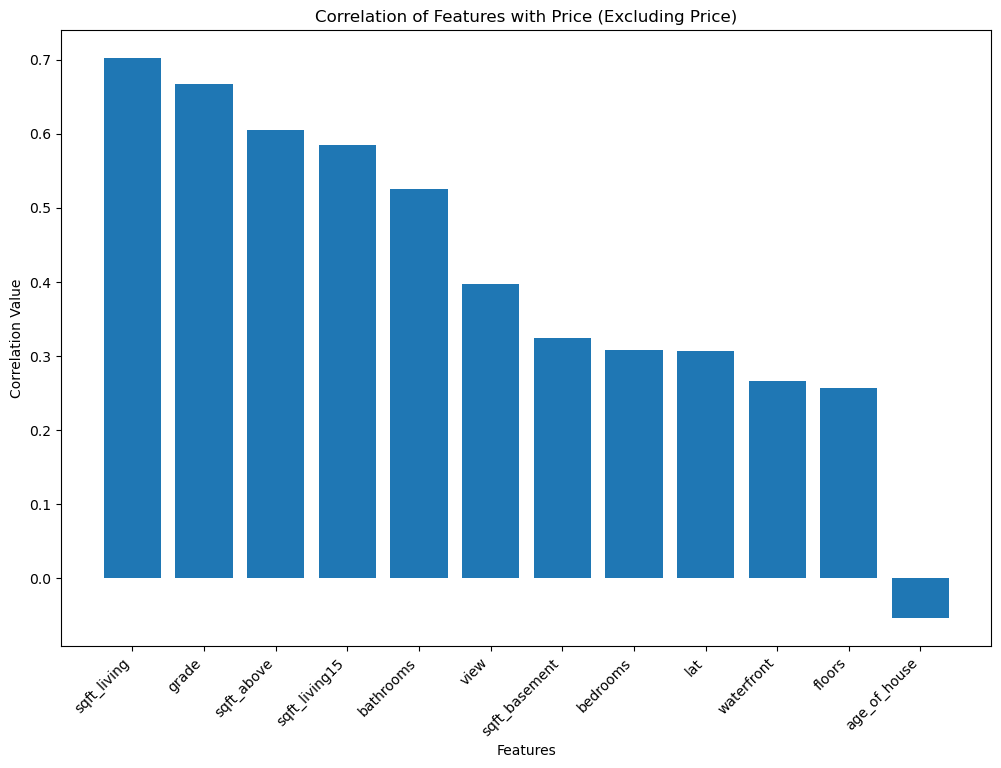

In [17]:
# Calculating correlation with 'price'
correlation_matrix = house.corr()
corr_price = correlation_matrix['price']

# Removing 'price' from the correlation series
corr_price = corr_price.drop('price')

# Sorting the correlations in descending order
sorted_corr_price = corr_price.sort_values(ascending=False)

# Creating a bar plot for sorted correlations
plt.figure(figsize=(12, 8))
plt.bar(sorted_corr_price.index, sorted_corr_price.values)
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation of Features with Price (Excluding Price)')
plt.xticks(rotation=45, ha='right')
plt.show()


According to the correlation chart, the size of the living space is what affects the price of the house the most, after the living space, the grade or the build quality is what affects the price the most.

### What is the relationship of living space and the price of the house?


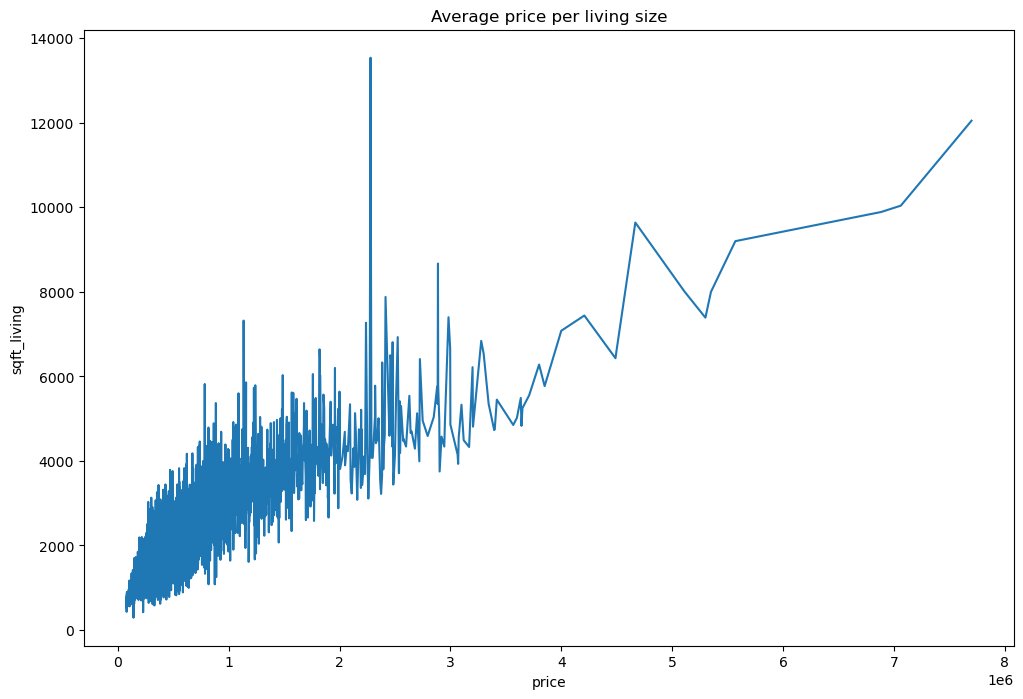

In [18]:
Price_per_livingspace = house.groupby('price')['sqft_living'].mean()

plt.figure(figsize=(12, 8)) 
plt.plot(Price_per_livingspace.index, Price_per_livingspace.values)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Average price per living size')
plt.show()

As seen in the graph above, it can be seen that there is an upward trend in the price of the Houses. Despite it being unstable around the lower parts, it can be seen that the minimum and maximum prices increases as the living size of the houses increase as well.

### Do homes that have a lot of living space usually have good build quality?

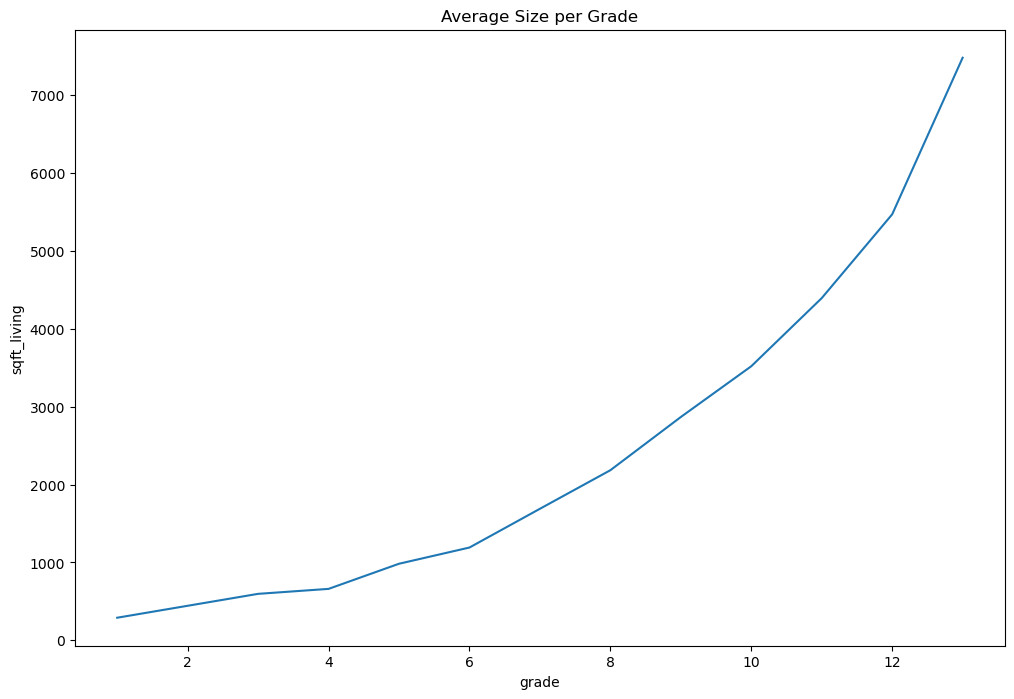

In [19]:
mean_size_per_Grade = house.groupby('grade')['sqft_living'].mean()

plt.figure(figsize=(12, 8)) 
plt.plot(mean_size_per_Grade.index, mean_size_per_Grade.values)
plt.xlabel('grade')
plt.ylabel('sqft_living')
plt.title('Average Size per Grade')
plt.show()

According to the graph, the relationship between the grade and the living space is directly proportional

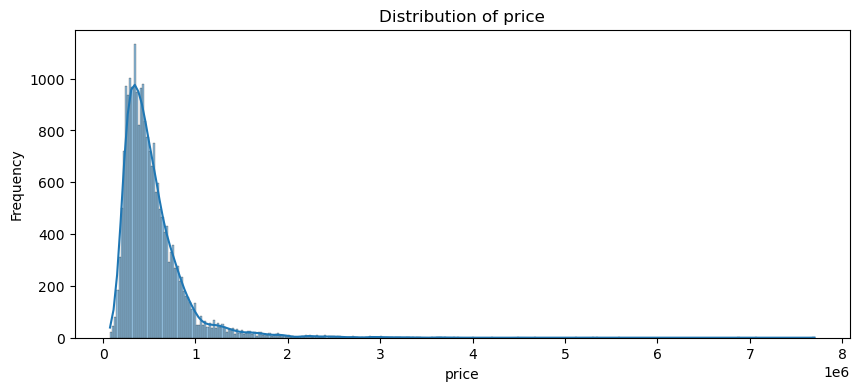

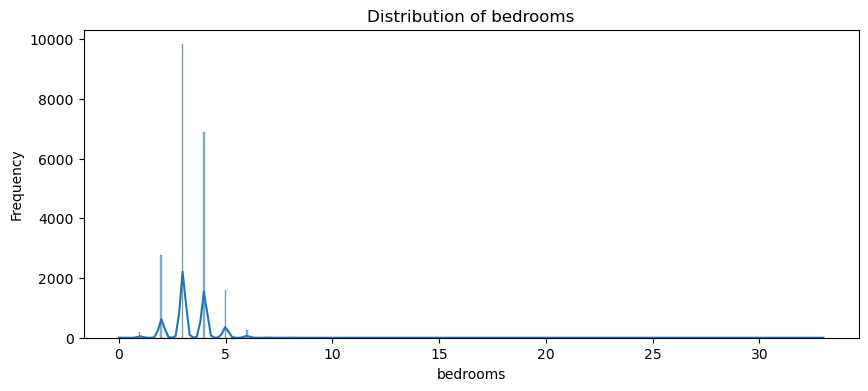

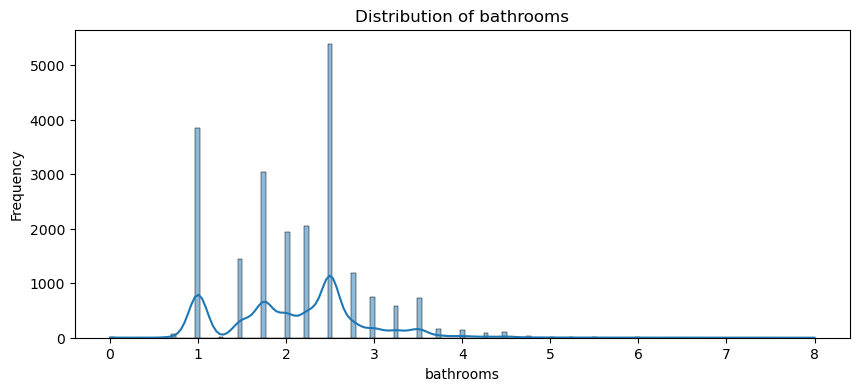

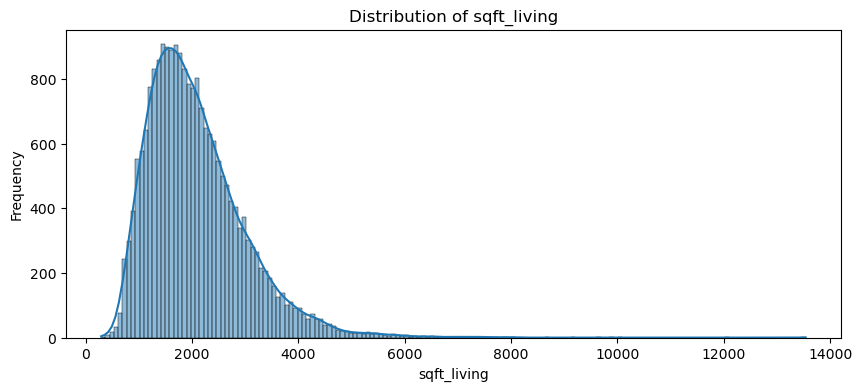

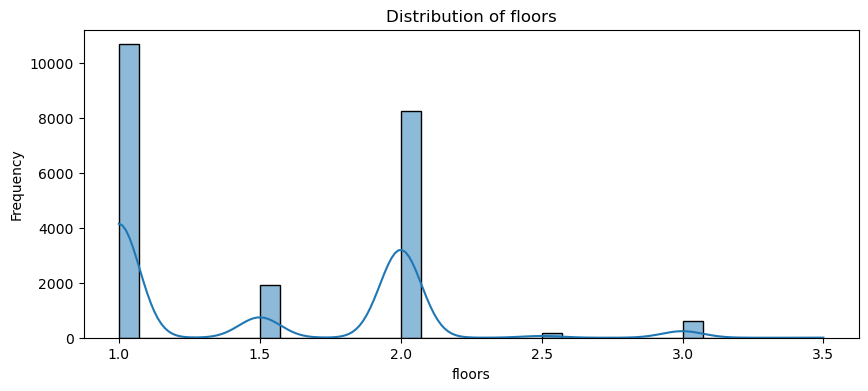

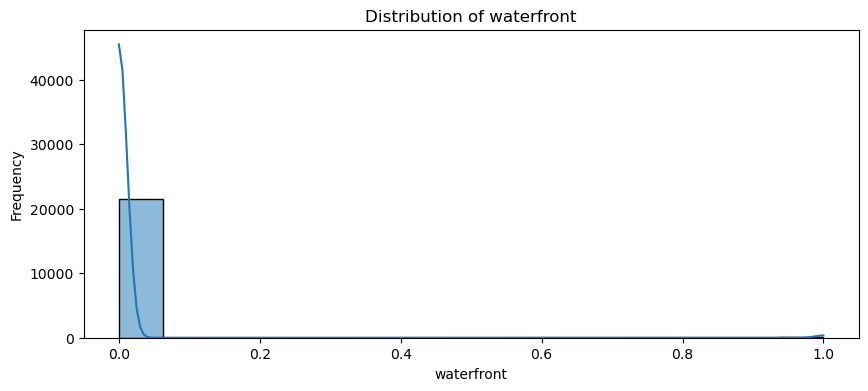

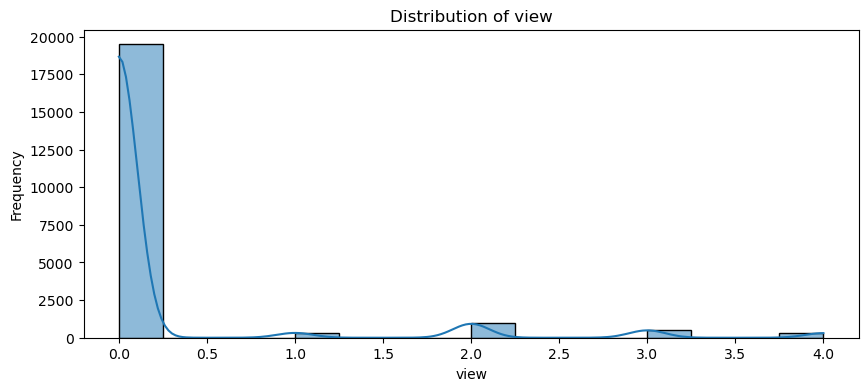

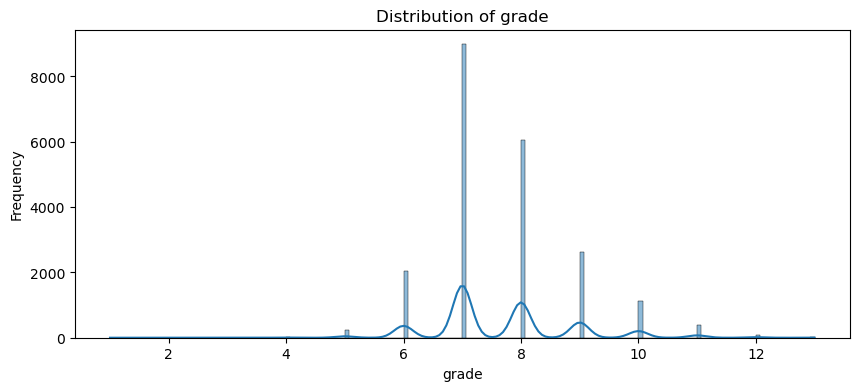

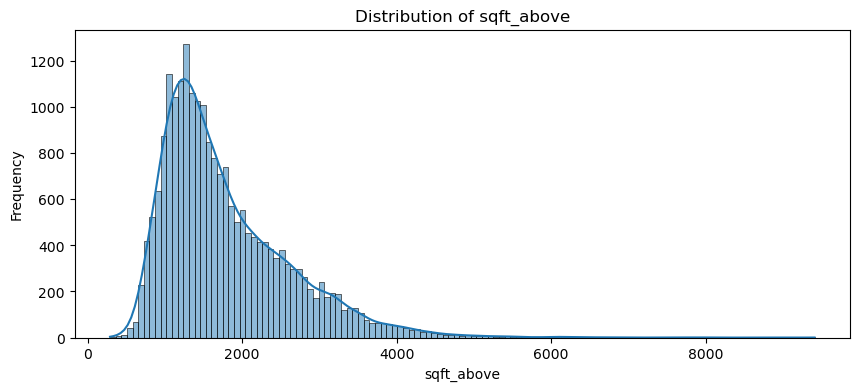

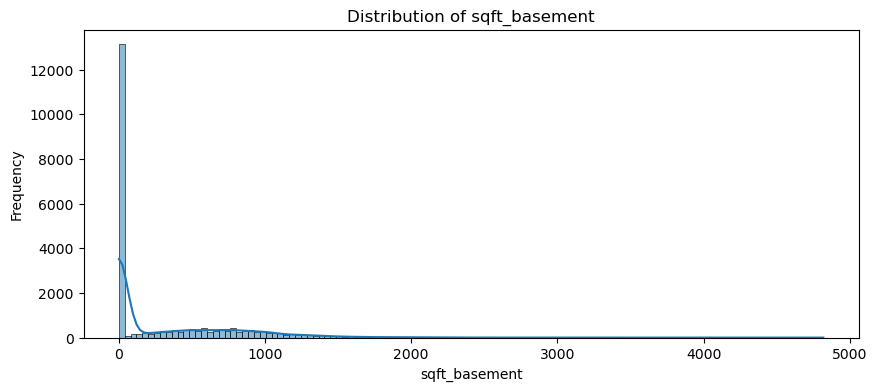

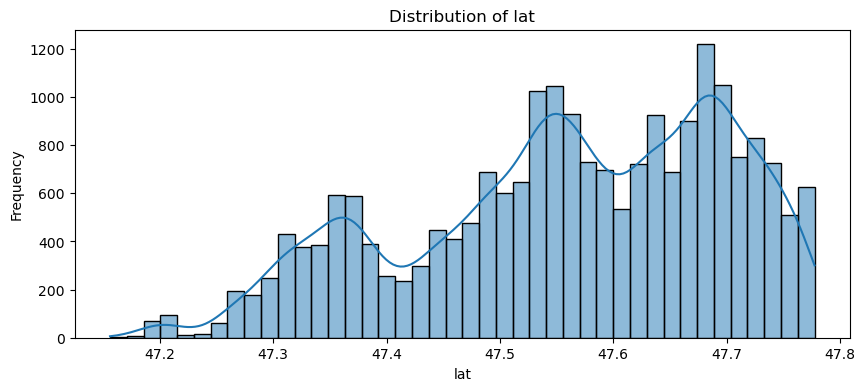

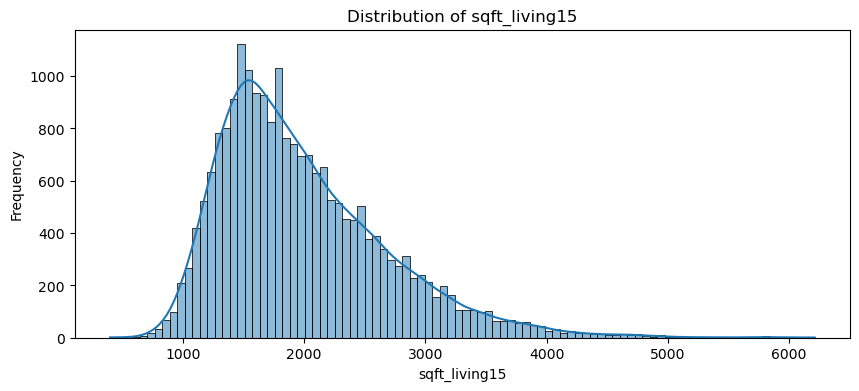

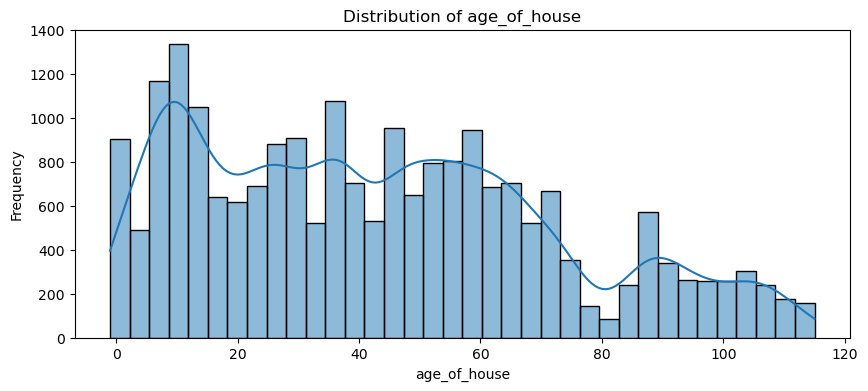

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for distribution analysis
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 
            'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'age_of_house']

# Plotting histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(house[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.show()


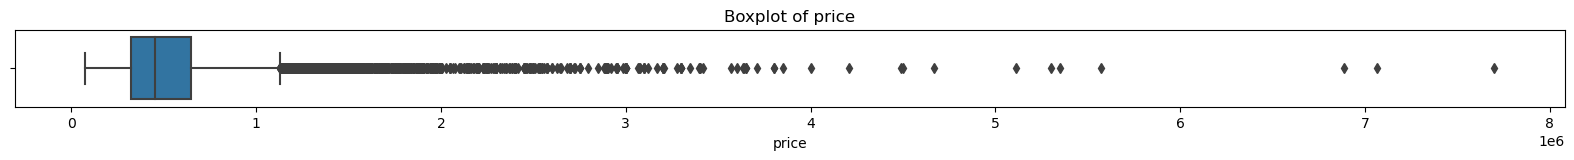

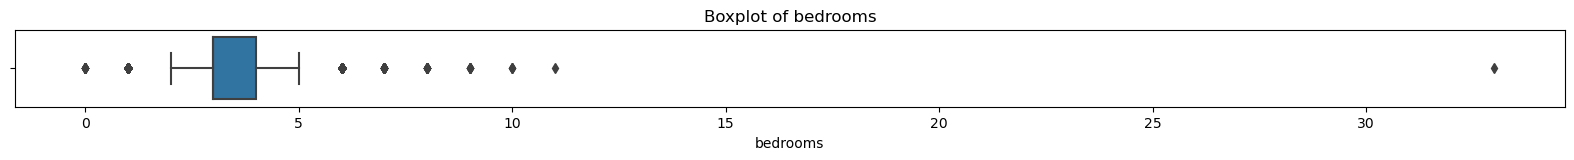

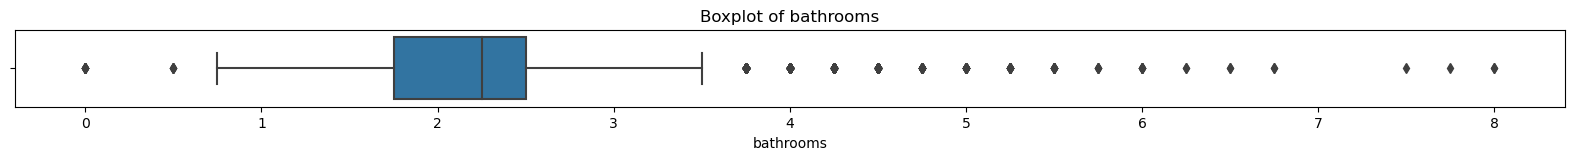

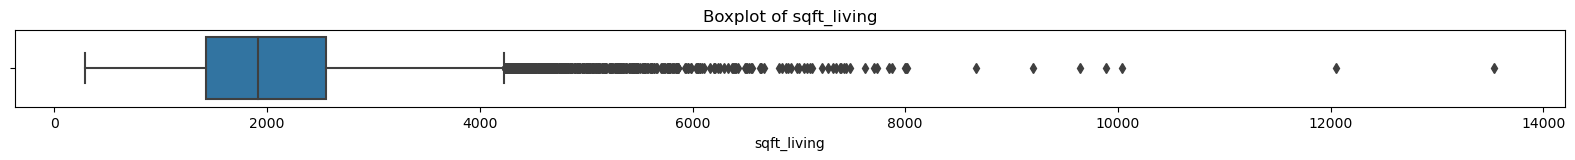

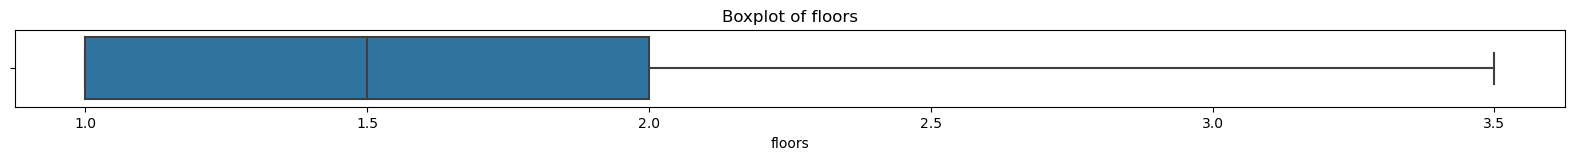

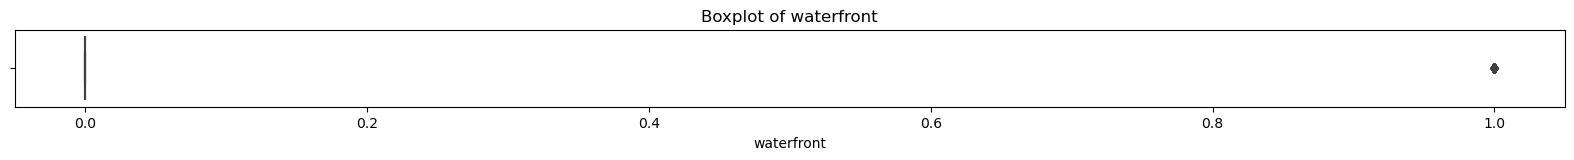

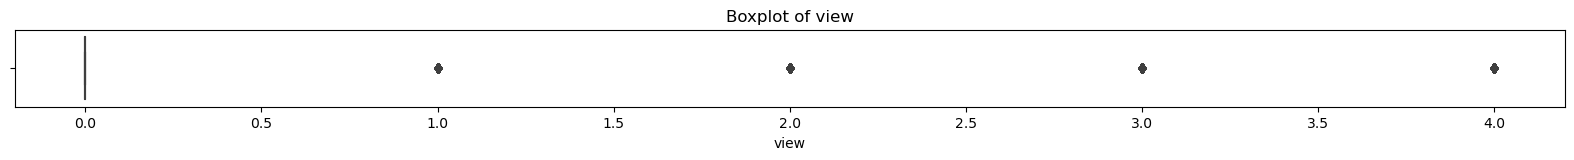

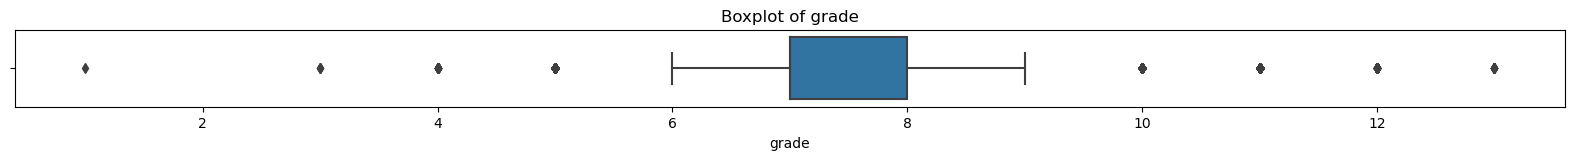

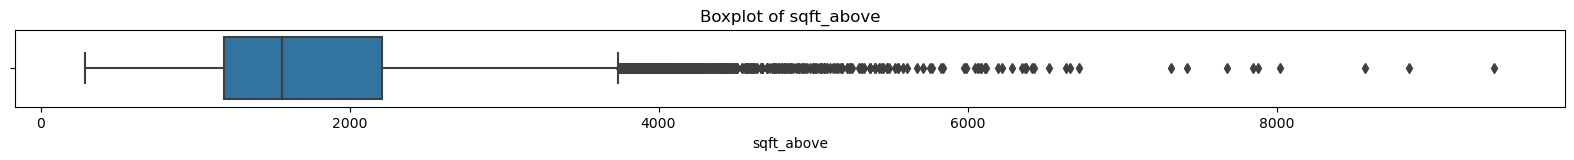

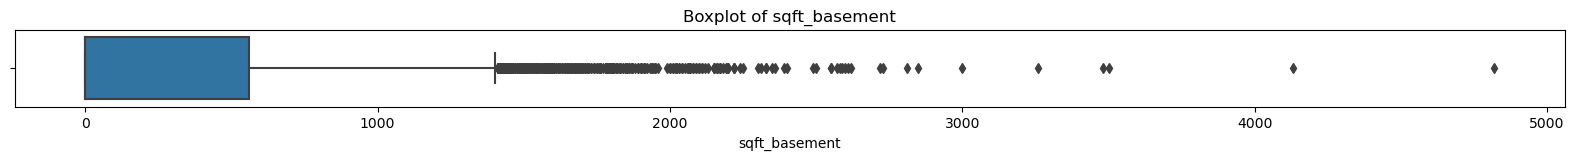

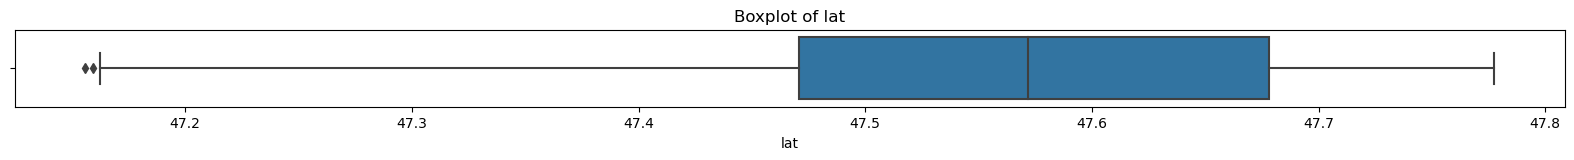

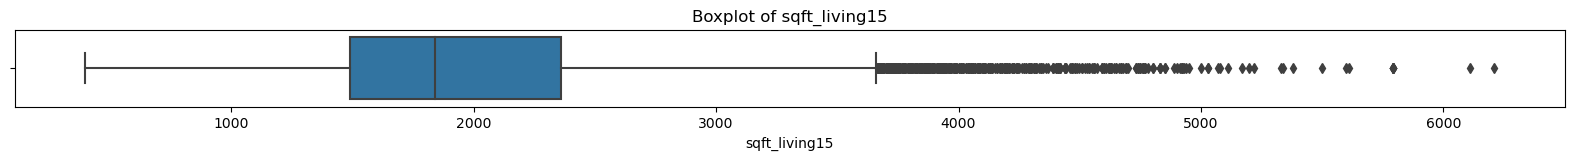

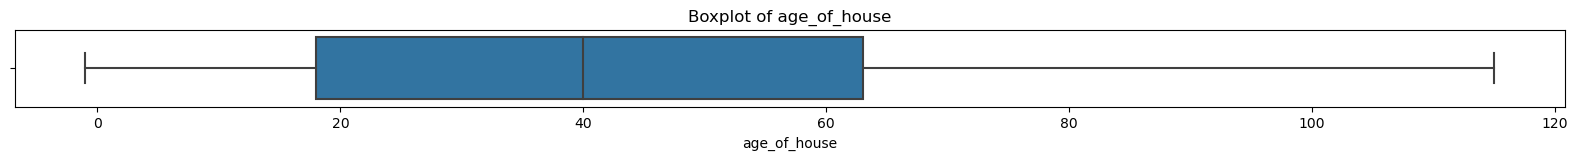

In [21]:
# Boxplots for outlier detection
for feature in features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=house[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


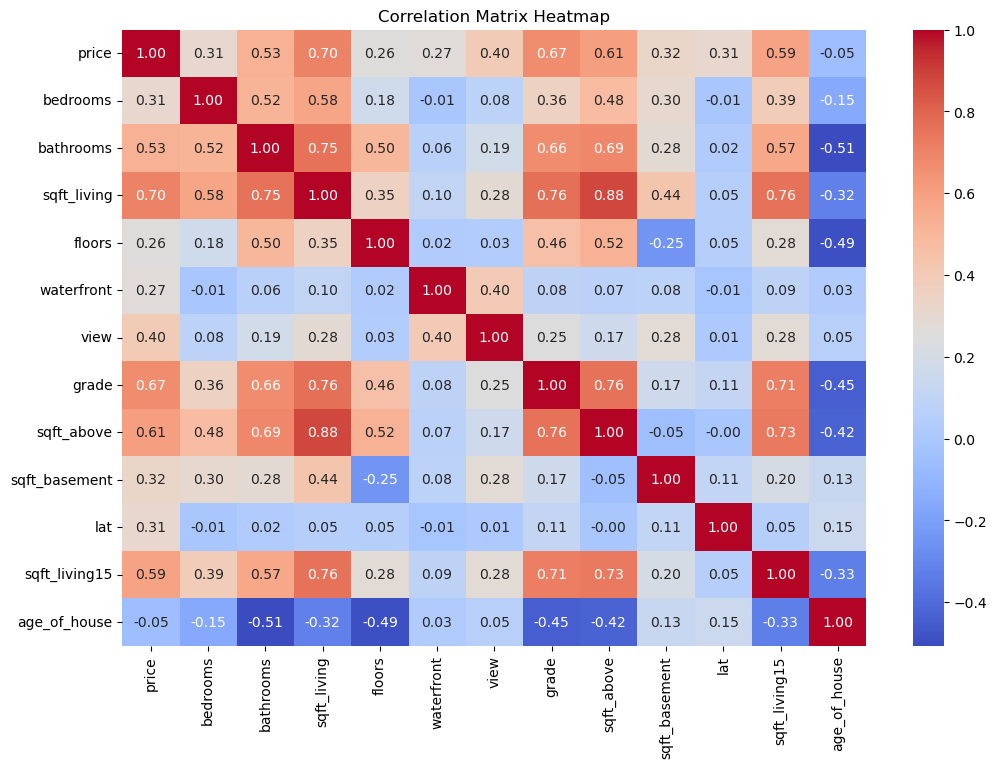

In [22]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(house[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## VI. MODEL TRAINING

In this section, we have trained and evaluated three different machine learning models to predict house prices: Ordinary Least Squares Linear Regression, Stochastic Gradient Descent Regression, and Support Vector Regression. Each model was chosen for its suitability to the regression task and its ability to capture different aspects of the dataset.

### Standardization of Features

- **Enhancing Model Performance**: Standardization adjusts the features to a common scale, which can be particularly beneficial for models sensitive to feature scales (e.g., SVM, KNN, and neural networks). It ensures that no single feature disproportionately influences the model due to its scale.


In [24]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Load your dataset
# house = pd.read_csv('path_to_your_dataset.csv')

# Separating the features (X) and target variable (y)
X = house.drop(columns=['price'])  # Exclude the target variable from transformations
y = house['price']

# Apply Yeo-Johnson transformation to the entire feature set
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
scaled_X = yeo_johnson_transformer.fit_transform(X)

# Convert transformed features back to DataFrame for better readability
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# Displaying the first few rows to verify the transformations
print(scaled_X.head())


C:\Users\loben\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:3310: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for distribution analysis
features = scaled_X.columns

# Plotting histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(scaled_X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.show()


In [ ]:
# Boxplots for outlier detection
for feature in features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=scaled_X[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


## Feature Exclusion Rationale

In the process of preparing our dataset for modeling, we observed that certain features ('view', 'sqft_basement', and 'waterfront') exhibited substantial skewness. Despite applying the Yeo-Johnson transformation, which is designed to stabilize variance and make distributions more Gaussian-like, these features retained a long-tailed skew. 

Skewed data can adversely affect the performance of many machine learning models, particularly those that assume normally distributed features or are sensitive to the scale and distribution of the data, such as linear regression models and algorithms that use distance metrics for predictions.

To ensure our models can learn effectively and generalize well, we have decided to exclude these features from our dataset. This decision is based on the understanding that the presence of highly skewed features might introduce noise or bias, potentially leading to less accurate predictions. 

Our goal is to create a dataset that allows our models to focus on the most relevant, well-distributed features, thereby increasing the robustness and reliability of our predictions.


In [ ]:
# Dropping 'view', 'basement', and 'waterfront' from the dataset
scaled_X = scaled_X.drop(['view', 'sqft_basement', 'waterfront'], axis=1)

In [ ]:
print("Features to be used:\n", scaled_X.dtypes)

## Not Use SVM
Given a big part of our data are outliers, we shouldn't use SVM as it will perform badly.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (scaled_X, y, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to create a polynomial regression model
def create_polynomial_regression_model(degree, model_type, alpha=0.0001):
    """
    Creates a polynomial regression model for the given degree
    :param degree: degree of the polynomial
    :param model_type: 'linear' or 'sgd' for Linear Regression or SGDRegressor
    """
    # Create a PolynomialFeatures object with the specified degree
    poly_features = PolynomialFeatures(degree=degree)

    # Create a Linear Regression or SGD model
    if model_type == 'linear':
        model = Ridge(alpha=alpha)
    elif model_type == 'sgd':
        model = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=alpha)

    # Creating a pipeline that first transforms the features into polynomial features, then fits the model
    pipeline = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", model)])

    return pipeline

def compute_accuracy_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Computing metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Printing the metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE (Train): {rmse_train:.2f}, RMSE (Test): {rmse_test:.2f}")
    print(f"MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}")
    print(f"R2 (Train): {r2_train:.2f}, R2 (Test): {r2_test:.2f}")
    print("\n")

## Polynomial Ridge Regression

This model is a fundamental approach for regression, providing a good baseline. It works well when the relationship between features and the target variable is linear.

In [ ]:
from sklearn.linear_model import LinearRegression
model = create_polynomial_regression_model(1, 'linear')
model.fit (X_train, y_train)

In [ ]:
compute_accuracy_metrics(model, X_train, y_train, X_test, y_test)

## Polynomial Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
model = create_polynomial_regression_model(1, 'sgd')
model.fit(X_train, y_train)

In [ ]:
compute_accuracy_metrics(model, X_train, y_train, X_test, y_test)

## Neural Networks

In [ ]:
! pip install -q tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Defining the Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # One hidden layer with 64 neurons
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model with a possibly lower learning rate
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predictions on training and test sets
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Computing metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Printing the metrics
print(f"Neural Network Model")
print(f"RMSE (Train): {rmse_train:.2f}, RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Train): {mae_train:.2f}, MAE (Test): {mae_test:.2f}")
print(f"R2 (Train): {r2_train:.2f}, R2 (Test): {r2_test:.2f}")

# VII. HYPERPARAMETER TUNING

In Order to find the best model to use in predicting the house prices given the features of the house, hyperparameter tuning must be accomplished.

## Polynomial Ridge Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np

# Create a Pipeline that includes polynomial feature transformation and Ridge regression
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

# Define the hyperparameters to be tuned
param_distributions = {
    'polynomial_features__degree': [1, 2, 3, 4, 5],  # Degrees of the polynomial
    'ridge_regression__alpha': np.logspace(-4, 4, 10)  # Regularization strength
}

# Perform Randomized Search with Cross-Validation
rscv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=1
)

# Fit the model to the training data
rscv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", rscv.best_params_)
print("Best Score:", rscv.best_score_)

# Evaluate the best model
best_estimator = rscv.best_estimator_
compute_accuracy_metrics(best_estimator, X_train, y_train, X_test, y_test)


## Polynomial Stochastic Gradient Descent

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import SGDRegressor
# import numpy as np

# Function to create a polynomial regression model with SGDRegressor
def create_polynomial_sgd_model(degree):
    """
    Creates a polynomial regression model with SGDRegressor for the given degree
    :param degree: degree of the polynomial
    """
    poly_features = PolynomialFeatures(degree=degree)
    sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)

    pipeline = Pipeline([
        ("polynomial_features", poly_features),
        ("sgd_regressor", sgd_regressor)
    ])

    return pipeline

# Define the hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'polynomial_features__degree': [1, 2, 3, 4, 5],  # Polynomial degrees
    'sgd_regressor__alpha': np.logspace(-4, 4, 10),  # Regularization strength
    'sgd_regressor__penalty': ['l2', 'l1'],  # Types of regularization
    'sgd_regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Create the polynomial SGD model
model = create_polynomial_sgd_model(1)  # Starting with a default degree of 1

# Set up Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=1
)

# Fit the Randomized Search model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model
best_estimator = random_search.best_estimator_
compute_accuracy_metrics(best_estimator, X_train, y_train, X_test, y_test)

## Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

# Define a custom wrapper for the Keras model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_neurons=64, learning_rate=0.1):
        self.n_neurons = n_neurons
        self.learning_rate = learning_rate
    
    def fit(self, X, y):
        self.model = Sequential([
            Dense(self.n_neurons, input_dim=X.shape[1], activation='relu'),
            Dense(1, activation='linear')
        ])
        self.model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mean_squared_error')
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Hyperparameters to tune
param_distributions = {
    'n_neurons': [32, 64, 128, 256],
    'learning_rate': np.logspace(-4, -1, 10)
}

# Initialize the KerasRegressorWrapper
nn_model = KerasRegressorWrapper()

# Set up Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=nn_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    random_state=42,
    verbose=1
)

# Fit the Randomized Search model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_nn_model = random_search.best_estimator_
compute_accuracy_metrics(best_nn_model, X_train, y_train, X_test, y_test)


## VIII. Model Selection

## IX. Insights and Conclusions

## X. References